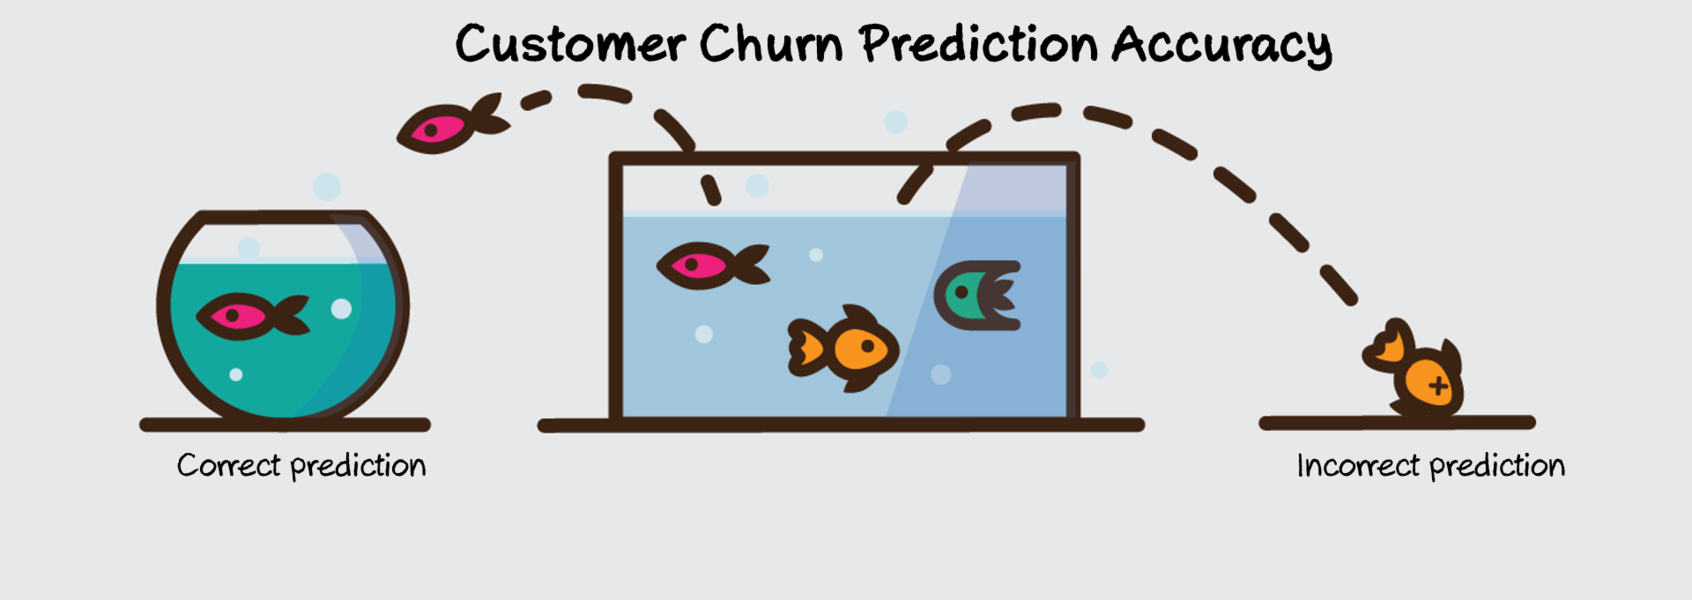

In [1]:
from IPython.display import Image
Image('churn.png')

# 1. Data preprocessing and exploration

## 1.1. Importing libraries and dataset

In [2]:
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [4]:
dataset.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [6]:
dataset.head(9)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


In [7]:
dataset.shape

(10000, 14)

In [9]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## 1.2. Statistical description

In [10]:
dataset.drop(['RowNumber','CustomerId','Surname'],
             axis=1, inplace=True)

In [11]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [13]:
dataset.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [14]:
dataset.describe(include=['object'])

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [16]:
dataset['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [17]:
dataset['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

## 1.3. Boxplot

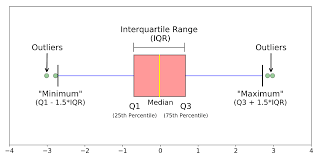

In [18]:
Image('boxplot.png')

<Axes: >

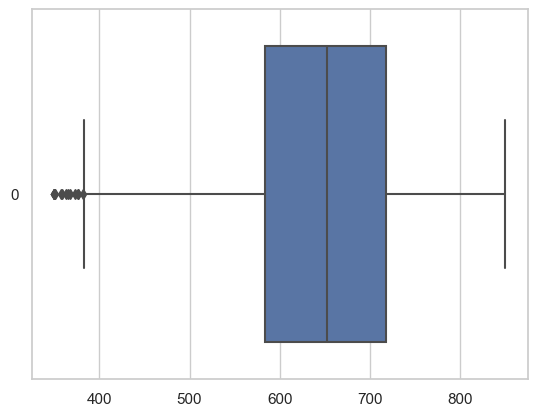

In [19]:
sns.set(style='whitegrid')
sns.boxplot(data = dataset['CreditScore'], orient = 'h')

In [20]:
IQR = dataset['CreditScore'].quantile(0.75)-dataset['CreditScore'].quantile(0.25)

In [21]:
IQR

134.0

In [22]:
Inf = dataset['CreditScore'].quantile(0.25)-1.5*IQR

In [23]:
Inf

383.0

In [26]:
dataset[dataset['CreditScore']<Inf]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
942,376,France,Female,46,6,0.00,1,1,0,157333.69,1
1193,363,Spain,Female,28,6,146098.43,3,1,0,100615.14,1
1405,359,France,Female,44,6,128747.69,1,1,0,146955.71,1
1631,350,Spain,Male,54,1,152677.48,1,1,1,191973.49,1
1838,350,Germany,Male,39,0,109733.20,2,0,0,123602.11,1
1962,358,Spain,Female,52,8,143542.36,3,1,0,141959.11,1
2473,351,Germany,Female,57,4,163146.46,1,1,0,169621.69,1
2579,365,Germany,Male,30,0,127760.07,1,1,0,81537.85,1
8154,367,Spain,Male,42,6,93608.28,1,1,0,168816.73,1


In [27]:
dataset[dataset['CreditScore']<Inf]['Exited'].mean()

1.0

In [28]:
Sup = dataset['CreditScore'].quantile(0.75)+1.5*IQR

In [29]:
Sup

919.0

In [30]:
my_list = ['CreditScore', 'Age']

In [31]:
my_list

['CreditScore', 'Age']

In [33]:
dataset[my_list].head(10)

,CreditScore,Age
0,619,42
1,608,41
2,502,42
3,699,39
4,850,43
5,645,44
6,822,50
7,376,29
8,501,44
9,684,27


<Axes: >

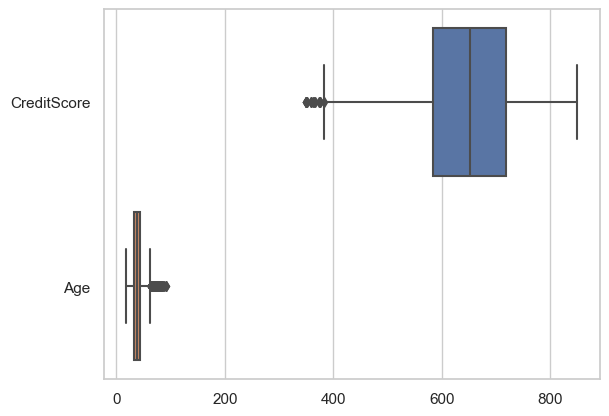

In [34]:
sns.boxplot(data = dataset[my_list], orient = 'h')

## 1.4. Scatter Plot

Text(0, 0.5, 'CreditScore')

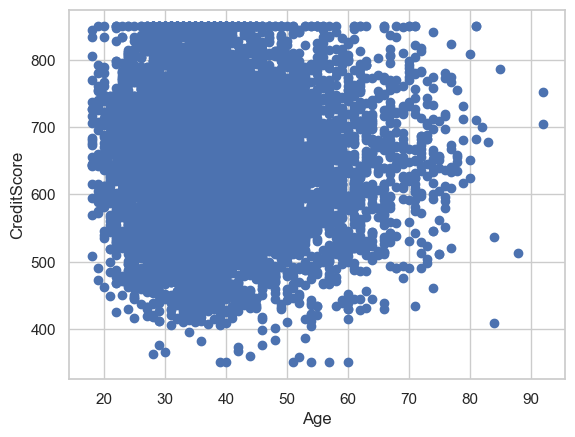

In [35]:
plt.scatter(x=dataset['Age'],y=dataset['CreditScore'])
plt.xlabel('Age')
plt.ylabel('CreditScore')

In [37]:
my_list_2 = ['CreditScore', 'EstimatedSalary', 'Age','Exited']

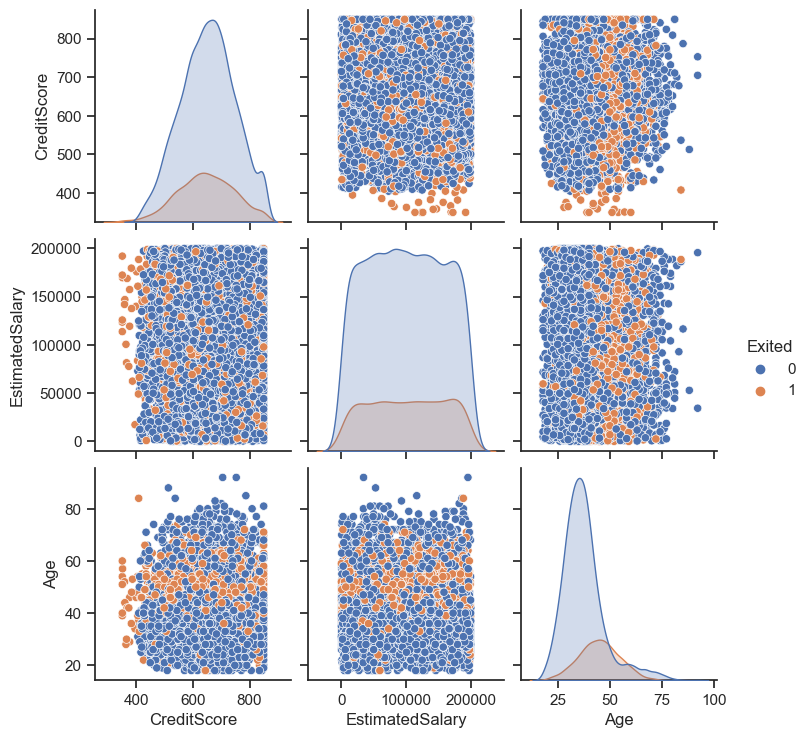

In [38]:
sns.set(style='ticks')
sns.pairplot(dataset[my_list_2], hue = 'Exited')

In [39]:
dataset[dataset['EstimatedSalary']<400]['Exited'].mean()

0.25

In [40]:
dataset[dataset['CreditScore']<400]['Exited'].count()

19

## 1.5. Input variables and target

In [41]:
dataset.shape

(10000, 11)

In [42]:
X = dataset.iloc[:,0:10]
y = dataset.iloc[:,10]

In [43]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [44]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [45]:
type(X)

pandas.core.frame.DataFrame

In [46]:
type(y)

pandas.core.series.Series

**Convert DataFrame to Numpy Array**

In [47]:
X = X.values
y = y.values

In [48]:
type(X)

numpy.ndarray

In [49]:
type(y)

numpy.ndarray

In [50]:
X[0:5,:]

array([[619, 'France', 'Female', 42, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 'Spain', 'Female', 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 'France', 'Female', 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [699, 'France', 'Female', 39, 1, 0.0, 2, 0, 0, 93826.63],
       [850, 'Spain', 'Female', 43, 2, 125510.82, 1, 1, 1, 79084.1]],
      dtype=object)

## 1.6. Encoding categorical data

In [51]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [52]:
X[:,1] = label.fit_transform(X[:,1])

In [53]:
X[0:10,:]

array([[619, 0, 'Female', 42, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 2, 'Female', 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 0, 'Female', 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [699, 0, 'Female', 39, 1, 0.0, 2, 0, 0, 93826.63],
       [850, 2, 'Female', 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [645, 2, 'Male', 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [822, 0, 'Male', 50, 7, 0.0, 2, 1, 1, 10062.8],
       [376, 1, 'Female', 29, 4, 115046.74, 4, 1, 0, 119346.88],
       [501, 0, 'Male', 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [684, 0, 'Male', 27, 2, 134603.88, 1, 1, 1, 71725.73]],
      dtype=object)

In [54]:
X[:,2] = label.fit_transform(X[:,2])

In [55]:
X[0:10,:]

array([[619, 0, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 2, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 0, 0, 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [699, 0, 0, 39, 1, 0.0, 2, 0, 0, 93826.63],
       [850, 2, 0, 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [645, 2, 1, 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [822, 0, 1, 50, 7, 0.0, 2, 1, 1, 10062.8],
       [376, 1, 0, 29, 4, 115046.74, 4, 1, 0, 119346.88],
       [501, 0, 1, 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [684, 0, 1, 27, 2, 134603.88, 1, 1, 1, 71725.73]], dtype=object)

**Dummy encoding**

In [56]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [57]:
X.shape

(10000, 10)

In [58]:
ct = ColumnTransformer([('Geography',OneHotEncoder(),[1])],\
                      remainder = 'passthrough')

In [59]:
X = ct.fit_transform(X)

In [60]:
X.shape

(10000, 12)

In [61]:
X[0:10,:]

array([[1.0, 0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
       [0.0, 0.0, 1.0, 608, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [1.0, 0.0, 0.0, 502, 0, 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [1.0, 0.0, 0.0, 699, 0, 39, 1, 0.0, 2, 0, 0, 93826.63],
       [0.0, 0.0, 1.0, 850, 0, 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [0.0, 0.0, 1.0, 645, 1, 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [1.0, 0.0, 0.0, 822, 1, 50, 7, 0.0, 2, 1, 1, 10062.8],
       [0.0, 1.0, 0.0, 376, 0, 29, 4, 115046.74, 4, 1, 0, 119346.88],
       [1.0, 0.0, 0.0, 501, 1, 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [1.0, 0.0, 0.0, 684, 1, 27, 2, 134603.88, 1, 1, 1, 71725.73]],
      dtype=object)

In [62]:
if X.shape[1] == 12:
    X = X[:,1:]

In [63]:
X.shape

(10000, 11)

In [64]:
X[0:10,:]

array([[0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
       [0.0, 1.0, 608, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [0.0, 0.0, 502, 0, 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [0.0, 0.0, 699, 0, 39, 1, 0.0, 2, 0, 0, 93826.63],
       [0.0, 1.0, 850, 0, 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [0.0, 1.0, 645, 1, 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [0.0, 0.0, 822, 1, 50, 7, 0.0, 2, 1, 1, 10062.8],
       [1.0, 0.0, 376, 0, 29, 4, 115046.74, 4, 1, 0, 119346.88],
       [0.0, 0.0, 501, 1, 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [0.0, 0.0, 684, 1, 27, 2, 134603.88, 1, 1, 1, 71725.73]],
      dtype=object)

In [65]:
dataset.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [66]:
features = ['Geography2','Geography3','CreditScore', 
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']

In [67]:
features

['Geography2',
 'Geography3',
 'CreditScore',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

## 1.7. Splitting dataset into train and test sets

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,
                                                random_state=0)

In [69]:
X_train.shape

(7000, 11)

In [70]:
X_test.shape

(3000, 11)

In [71]:
y.mean()

0.2037

In [72]:
X.mean()

16115.853424454515

In [73]:
print(y_train.mean())
print(y_test.mean())

0.2022857142857143
0.207


## 1.8. Feature scaling

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [75]:
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

from sklearn.preprocessing import MinMaxScaler

In [76]:
X_train[0,:]

array([0.0, 0.0, 641, 1, 33, 2, 146193.6, 2, 1, 1, 55796.83], dtype=object)

In [77]:
X_train_sc[0,:]

array([-0.56987189, -0.5731713 , -0.09792126,  0.92295821, -0.55759842,
       -1.03635146,  1.13249447,  0.81039385,  0.64198477,  0.96683535,
       -0.76862426])

In [78]:
(667 - X_train[:,2].mean())/(X_train[:,2].std())

0.16941046863775655

In [ ]:
scaler.inverse_transform(X_train_sc)

# 2. k Nearest Neighbors

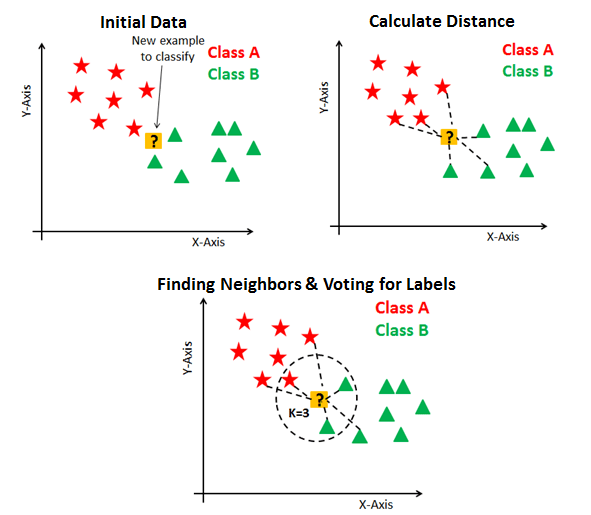

In [79]:
Image('knn.png')

In [80]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

In [81]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [82]:
y_pred_knn = knn.predict(X_test)

In [83]:
for i in range(10):
    print(y_test[i], y_pred_knn[i])

0 0
1 0
0 0
0 0
0 0
1 0
0 0
0 1
1 0
1 0


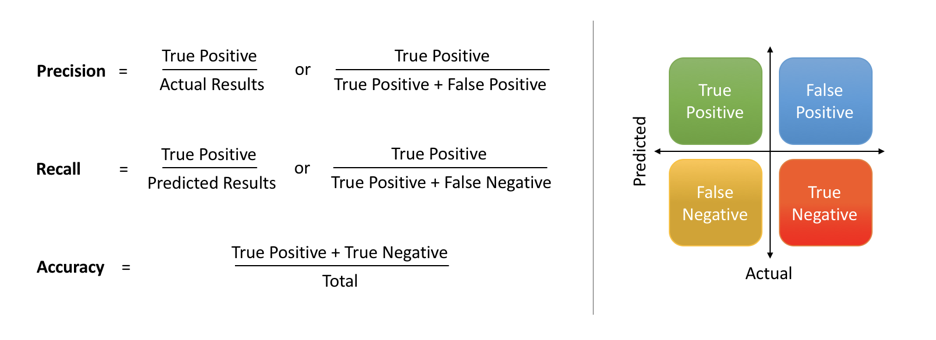

In [84]:
Image('metrics.png')

In [85]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [86]:
print('Confusion matrix knn \n', confusion_matrix(y_test,y_pred_knn))
print('Accuracy knn', accuracy_score(y_test,y_pred_knn))

Confusion matrix knn 
 [[2210  169]
 [ 563   58]]
Accuracy knn 0.756


In [88]:
from sklearn.metrics import precision_score, recall_score

In [89]:
print('Recall knn', recall_score(y_test,y_pred_knn))
print('Precision knn', precision_score(y_test,y_pred_knn))

Recall knn 0.09339774557165861
Precision knn 0.2555066079295154


In [90]:
from sklearn.metrics import classification_report

In [91]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      2379
           1       0.26      0.09      0.14       621

    accuracy                           0.76      3000
   macro avg       0.53      0.51      0.50      3000
weighted avg       0.68      0.76      0.71      3000



**Grid search**

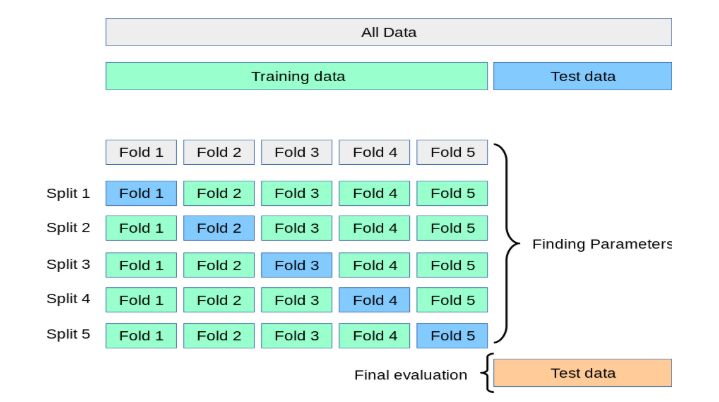

In [92]:
Image('grid.png')

In [93]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors' : [1,3,5,7,9,11,13,15,17,19,21,23,25,27,31]}
model = KNeighborsClassifier()
clf = GridSearchCV(model,parameters, scoring='accuracy', cv=6)
grille = clf.fit(X_train_sc,y_train)
print(grille.best_params_)
print(grille.best_score_)

{'n_neighbors': 13}
0.830428012971545


In [94]:
knnop= KNeighborsClassifier(n_neighbors=13) 

In [95]:
model=knnop.fit(X_train_sc,y_train)

In [96]:
y_pred_knnop=model.predict(X_test_sc)

In [97]:
print(classification_report(y_test,y_pred_knnop))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2379
           1       0.72      0.36      0.48       621

    accuracy                           0.84      3000
   macro avg       0.79      0.66      0.69      3000
weighted avg       0.83      0.84      0.82      3000



In [98]:
y_pred_knn_o = grille.predict(X_test_sc)

In [99]:
print('Confusion matrix knn op \n', confusion_matrix(y_test,y_pred_knn_o))
print('Accuracy knn op', accuracy_score(y_test,y_pred_knn_o))
print('Recall knn op', recall_score(y_test,y_pred_knn_o))
print('Precision knn op', precision_score(y_test,y_pred_knn_o))

Confusion matrix knn op 
 [[2293   86]
 [ 398  223]]
Accuracy knn op 0.8386666666666667
Recall knn op 0.35909822866344604
Precision knn op 0.7216828478964401


In [100]:
print(classification_report(y_test,y_pred_knn_o))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2379
           1       0.72      0.36      0.48       621

    accuracy                           0.84      3000
   macro avg       0.79      0.66      0.69      3000
weighted avg       0.83      0.84      0.82      3000



# 3. Decision Tree

In [ ]:
Image('decision.png')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train,y_train)

In [ ]:
y_pred_dt = dt.predict(X_test)

In [ ]:
for i in range(10):
    print(y_test[i],y_pred_dt[i])

In [ ]:
print('Confusion matrix dt \n', confusion_matrix(y_test,y_pred_dt))
print('Accuracy dt', accuracy_score(y_test,y_pred_dt))
print('Recall dt', recall_score(y_test,y_pred_dt))
print('Precision dt', precision_score(y_test,y_pred_dt))

In [ ]:
print(classification_report(y_test,y_pred_dt))

**Visualization**

In [ ]:
!

In [ ]:
import graphviz
from sklearn import tree
from sklearn.tree import export_graphviz
model = DecisionTreeClassifier(max_depth = 5)
model.fit(X,y)

In [ ]:
tree.export_graphviz(model,feature_names = features,\
                    out_file = 'dt_cdoss.dot',\
                    label = 'all',\
                    filled = True,\
                    rounded = True)

In [ ]:
Image('dt_cdoss.png')

In [ ]:
!dot -Tpng -Gdpi=300 dt_cdoss.dot -o tree.png

# 4. Random Forest

In [ ]:
Image('random_forest.png')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)

In [ ]:
rf.fit(X_train,y_train)

In [ ]:
y_pred_rf = rf.predict(X_test)

In [ ]:
print('Confusion matrix rf \n', confusion_matrix(y_test,y_pred_rf))
print('Accuracy rf', accuracy_score(y_test,y_pred_rf))
print('Recall rf', recall_score(y_test,y_pred_rf))
print('Precision rf', precision_score(y_test,y_pred_rf))

In [ ]:
print(classification_report(y_test,y_pred_rf))

# 5. Features selection

In [ ]:
importances = rf.feature_importances_

In [ ]:
importances

In [ ]:
sorted_idx = np.argsort(importances)

In [ ]:
features_arr = np.asarray(features)

In [ ]:
padding=np.arange(X_train_sc.size/len(X_train_sc))
plt.barh(padding,importances[sorted_idx],align='center')
plt.yticks(padding,features_arr[sorted_idx])
plt.xlabel('Relative importance')
plt.title('Variable importance')

# 6. Support vector Machine

In [ ]:
Image('linear_svm.png')

In [ ]:
Image('kernel_svm.png')

In [ ]:
from sklearn.svm import SVC
linear_SVM = SVC(kernel='linear')
linear_SVM.fit(X_train_sc,y_train)

In [ ]:
y_predictSVM_l = linear_SVM.predict(X_test_sc)
print(confusion_matrix(y_test,y_predictSVM_l))
print('Accuracy linear SVM {0:.3f}'.format(accuracy_score(y_test,y_predictSVM_l)))
print('Precision linear SVM {0:.3f}'.format(precision_score(y_test,y_predictSVM_l)))
print('Recall linear SVM {0:.3f}'.format(recall_score(y_test,y_predictSVM_l)))

In [ ]:
print(classification_report(y_test,y_predictSVM_l))

In [ ]:
kernel_SVM = SVC(kernel='rbf')
kernel_SVM.fit(X_train_sc,y_train)

In [ ]:
y_predictSVM_k = kernel_SVM.predict(X_test_sc)
print(confusion_matrix(y_test,y_predictSVM_k))
print('Accuracy rbf SVM {0:.3f}'.format(accuracy_score(y_test,y_predictSVM_k)))
print('Precision rbf SVM {0:.3f}'.format(precision_score(y_test,y_predictSVM_k)))
print('Recall rbf SVM {0:.3f}'.format(recall_score(y_test,y_predictSVM_k)))

In [ ]:
print(classification_report(y_test,y_predictSVM_k))

# 7. Logistic Regression

In [ ]:
Image(filename='logistic.png')

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train_sc,y_train)

In [ ]:
y_predictLR = LR.predict(X_test_sc)
print(confusion_matrix(y_test,y_predictLR))
print('Accuracy Logistic Regression {0:.3f}'.format(accuracy_score(y_test,y_predictLR)))
print('Precision Logistic Regression {0:.3f}'.format(precision_score(y_test,y_predictLR)))
print('Recall Logistic Regression {0:.3f}'.format(recall_score(y_test,y_predictLR)))

In [ ]:
print(classification_report(y_test,y_predictLR))

# 8. Summary

| Algorithm       | Accuracy     |Recall | Precision |
| :------------- | -----------|-----------|-----------:|
|  Optimized kNN  | 0.834    | 0.377 | 0.659 |
| Decision Tree   | 0.804  | 0.572 | 0.514 |
| Random Forest | 0.865 | 0.523 | 0.736 |
| linear SVM   | 0.797  | 0.000 | 0.000 |
| kernel SVM   | 0.864  | 0.444 | 0.789 |
| Logistic Regression | 0.811 | 0.237 | 0.582 |

# 9. Receiver Operating Characteristic (ROC) Curve

In [ ]:
Image(filename='roc_curve.png')

In [ ]:
from sklearn import metrics
fpr,tpr,thr = metrics.roc_curve(y_test,y_pred_knn_o)
fpr2,tpr2,thr2 = metrics.roc_curve(y_test,y_predictLR)
fpr3,tpr3,thr3 = metrics.roc_curve(y_test,y_pred_dt)
fpr4,tpr4,thr4 = metrics.roc_curve(y_test,y_predictSVM_l)
fpr5,tpr5,thr5 = metrics.roc_curve(y_test,y_predictSVM_k)
fpr6,tpr6,thr6 = metrics.roc_curve(y_test,y_pred_rf)
auc = metrics.auc(fpr,tpr)
auc2 = metrics.auc(fpr2,tpr2)
auc3 = metrics.auc(fpr3,tpr3)
auc4 = metrics.auc(fpr4,tpr4)
auc5 = metrics.auc(fpr5,tpr5)
auc6 = metrics.auc(fpr6,tpr6)
plt.plot(fpr,tpr,'-',lw=2,label='gamma=0.01,AUC KNN_O =%.2f'%auc)
plt.plot(fpr2,tpr2,'-',lw=2,label='gamma=0.01,AUC LR=%.2f'%auc2)
plt.plot(fpr3,tpr3,'-',lw=2,label='gamma=0.01,AUC DT=%.2f'%auc3)
plt.plot(fpr4,tpr4,'-',lw=2,label='gamma=0.01,AUC SVM_l=%.2f'%auc4)
plt.plot(fpr5,tpr5,'-',lw=2,label='gamma=0.01,AUC SVM_k=%.2f'%auc5)
plt.plot(fpr6,tpr6,'-',lw=2,label='gamma=0.01,AUC RF=%.2f'%auc6)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN, LR, DT, SVM & RF ROC curves')
plt.legend(loc='lower right')
plt.show()

**Random Forest est le meilleur algorithme**